In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 28 21:46:23 2016

@author: stephen
"""

from __future__ import print_function
import sys

sys.path.append("../")
import utils
import time
from tensorflow import keras
# from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(813306)

start = time.time()


def readucr(filename):
    data = np.loadtxt(filename)
    Y = data[:, 0]
    X = data[:, 1:]
    return X, Y


epochs = 5000

flist = ["../../datasets/GunPoint/GunPoint"]

for each in flist:
    fname = each
    x_train, y_train = readucr(fname + "_TRAIN.txt")
    x_test, y_test = readucr(fname + "_TEST.txt")
    nb_classes = len(np.unique(y_test))
    y_train = (
        (y_train - y_train.min()) / (y_train.max() - y_train.min()) * (nb_classes - 1)
    )
    y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min()) * (nb_classes - 1)
    batch_size = int(min(x_train.shape[0] / 10, 16))

    Y_train = keras.utils.to_categorical(y_train, nb_classes)
    Y_test = keras.utils.to_categorical(y_test, nb_classes)

    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean) / (x_train_std)

    # x_test_min = np.min(x_test, axis = 1, keepdims=1)
    # x_test_max = np.max(x_test, axis = 1, keepdims=1)
    x_test = (x_test - x_train_mean) / (x_train_std)

    # x_train = x_train.reshape(x_train.shape + (1,))
    # x_test = x_test.reshape(x_test.shape + (1,))

    x = keras.layers.Input(x_train.shape[1:])
    y = keras.layers.Dropout(0.1)(x)
    y = keras.layers.Dense(500, activation="relu")(y)
    y = keras.layers.Dropout(0.2)(y)
    y = keras.layers.Dense(500, activation="relu")(y)
    y = keras.layers.Dropout(0.2)(y)
    y = keras.layers.Dense(500, activation="relu")(y)
    y = keras.layers.Dropout(0.3)(y)
    out = keras.layers.Dense(nb_classes, activation="softmax")(y)

    model = keras.models.Model(inputs=x, outputs=out)

    optimizer = keras.optimizers.Adadelta()
    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=200, min_lr=0.1
    )

    # es = EarlyStopping(monitor="val_loss", verbose=1, min_delta=0.001, patience=200)

    hist = model.fit(
        x_train,
        Y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test, Y_test),
        callbacks=[
            reduce_lr, 
            # es
        ],
    )
elapsed_time = time.time() - start
model.save("../data/MLP.h5")

Epoch 1/5000
10/10 [==============================] - 9s 266ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.6980 - val_accuracy: 0.5267 - lr: 0.0010
Epoch 2/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.7193 - accuracy: 0.6000 - val_loss: 0.6972 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 3/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.5723 - accuracy: 0.8000 - val_loss: 0.6965 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 4/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.8007 - accuracy: 0.4200 - val_loss: 0.6955 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 5/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.7160 - accuracy: 0.4600 - val_loss: 0.6947 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 6/5000
10/10 [==============================] - 0s 38ms/step - loss: 0.7266 - accuracy: 0.4400 - val_loss: 0.6940 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 7/5000
10/10 [==============================] - 0s 34ms/s

10/10 [==============================] - 0s 35ms/step - loss: 0.7407 - accuracy: 0.3600 - val_loss: 0.6695 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 54/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.7419 - accuracy: 0.4200 - val_loss: 0.6691 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 55/5000
10/10 [==============================] - 0s 51ms/step - loss: 0.6764 - accuracy: 0.6400 - val_loss: 0.6686 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 56/5000
10/10 [==============================] - 1s 64ms/step - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.6682 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 57/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.6635 - accuracy: 0.6000 - val_loss: 0.6677 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 58/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.7114 - accuracy: 0.5200 - val_loss: 0.6673 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 59/5000
10/10 [==============================] - 0s 38ms/step - lo

10/10 [==============================] - 0s 37ms/step - loss: 0.7217 - accuracy: 0.4400 - val_loss: 0.6485 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 106/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.6117 - accuracy: 0.6800 - val_loss: 0.6481 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 107/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.6820 - accuracy: 0.4800 - val_loss: 0.6477 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 108/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.6556 - accuracy: 0.6200 - val_loss: 0.6473 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 109/5000
10/10 [==============================] - 1s 72ms/step - loss: 0.6491 - accuracy: 0.6600 - val_loss: 0.6470 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 110/5000
10/10 [==============================] - 1s 63ms/step - loss: 0.6029 - accuracy: 0.6400 - val_loss: 0.6467 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 111/5000
10/10 [==============================] - 0s 46ms/ste

Epoch 157/5000
10/10 [==============================] - 0s 38ms/step - loss: 0.6350 - accuracy: 0.6800 - val_loss: 0.6291 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 158/5000
10/10 [==============================] - 0s 45ms/step - loss: 0.6605 - accuracy: 0.6600 - val_loss: 0.6288 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 159/5000
10/10 [==============================] - 1s 60ms/step - loss: 0.7221 - accuracy: 0.5600 - val_loss: 0.6285 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 160/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.6763 - accuracy: 0.5200 - val_loss: 0.6281 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 161/5000
10/10 [==============================] - 1s 54ms/step - loss: 0.6518 - accuracy: 0.6600 - val_loss: 0.6277 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 162/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.6568 - accuracy: 0.6600 - val_loss: 0.6274 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 163/5000
10/10 [==============================

Epoch 209/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.6296 - accuracy: 0.7000 - val_loss: 0.6111 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 210/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.6176 - accuracy: 0.6800 - val_loss: 0.6109 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 211/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.6305 - accuracy: 0.6000 - val_loss: 0.6105 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 212/5000
10/10 [==============================] - 0s 47ms/step - loss: 0.6101 - accuracy: 0.6200 - val_loss: 0.6102 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 213/5000
10/10 [==============================] - 1s 67ms/step - loss: 0.6093 - accuracy: 0.7400 - val_loss: 0.6098 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 214/5000
10/10 [==============================] - 0s 47ms/step - loss: 0.6301 - accuracy: 0.6600 - val_loss: 0.6095 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 215/5000
10/10 [==============================

Epoch 261/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.5778 - accuracy: 0.7400 - val_loss: 0.5947 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 262/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.6474 - accuracy: 0.6800 - val_loss: 0.5944 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 263/5000
10/10 [==============================] - 0s 40ms/step - loss: 0.5609 - accuracy: 0.8000 - val_loss: 0.5941 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 264/5000
10/10 [==============================] - 0s 54ms/step - loss: 0.6260 - accuracy: 0.6200 - val_loss: 0.5938 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 265/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.6222 - accuracy: 0.6200 - val_loss: 0.5935 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 266/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.5855 - accuracy: 0.6400 - val_loss: 0.5933 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 267/5000
10/10 [==============================

Epoch 313/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.5668 - accuracy: 0.7600 - val_loss: 0.5794 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 314/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.5607 - accuracy: 0.7400 - val_loss: 0.5791 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 315/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.5713 - accuracy: 0.6800 - val_loss: 0.5788 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 316/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.6491 - accuracy: 0.6200 - val_loss: 0.5785 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 317/5000
10/10 [==============================] - 0s 51ms/step - loss: 0.5272 - accuracy: 0.7400 - val_loss: 0.5782 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 318/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.5872 - accuracy: 0.6800 - val_loss: 0.5779 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 319/5000
10/10 [==============================

Epoch 365/5000
10/10 [==============================] - 1s 68ms/step - loss: 0.5915 - accuracy: 0.6400 - val_loss: 0.5647 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 366/5000
10/10 [==============================] - 1s 71ms/step - loss: 0.5773 - accuracy: 0.7200 - val_loss: 0.5644 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 367/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.5543 - accuracy: 0.7200 - val_loss: 0.5642 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 368/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.5652 - accuracy: 0.7200 - val_loss: 0.5640 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 369/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.5631 - accuracy: 0.7400 - val_loss: 0.5636 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 370/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.5934 - accuracy: 0.6800 - val_loss: 0.5634 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 371/5000
10/10 [==============================

Epoch 417/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.5214 - accuracy: 0.7800 - val_loss: 0.5515 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 418/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.5861 - accuracy: 0.7000 - val_loss: 0.5512 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 419/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.5680 - accuracy: 0.7400 - val_loss: 0.5509 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 420/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.5273 - accuracy: 0.7800 - val_loss: 0.5506 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 421/5000
10/10 [==============================] - 1s 61ms/step - loss: 0.5740 - accuracy: 0.7200 - val_loss: 0.5503 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 422/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.6415 - accuracy: 0.5800 - val_loss: 0.5501 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 423/5000
10/10 [==============================

Epoch 469/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.5935 - accuracy: 0.6600 - val_loss: 0.5384 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 470/5000
10/10 [==============================] - 0s 47ms/step - loss: 0.4727 - accuracy: 0.8600 - val_loss: 0.5381 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 471/5000
10/10 [==============================] - 0s 45ms/step - loss: 0.4998 - accuracy: 0.7600 - val_loss: 0.5378 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 472/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.5310 - accuracy: 0.7600 - val_loss: 0.5377 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 473/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.5273 - accuracy: 0.7200 - val_loss: 0.5374 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 474/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.5671 - accuracy: 0.7000 - val_loss: 0.5371 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 475/5000
10/10 [==============================

Epoch 521/5000
10/10 [==============================] - 0s 47ms/step - loss: 0.5048 - accuracy: 0.8400 - val_loss: 0.5271 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 522/5000
10/10 [==============================] - 0s 51ms/step - loss: 0.5255 - accuracy: 0.7800 - val_loss: 0.5268 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 523/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.4914 - accuracy: 0.7600 - val_loss: 0.5265 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 524/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.5557 - accuracy: 0.6800 - val_loss: 0.5263 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 525/5000
10/10 [==============================] - 1s 52ms/step - loss: 0.4958 - accuracy: 0.8200 - val_loss: 0.5260 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 526/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.5031 - accuracy: 0.7600 - val_loss: 0.5257 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 527/5000
10/10 [==============================

Epoch 573/5000
10/10 [==============================] - 1s 62ms/step - loss: 0.4987 - accuracy: 0.7400 - val_loss: 0.5156 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 574/5000
10/10 [==============================] - 0s 54ms/step - loss: 0.5104 - accuracy: 0.7400 - val_loss: 0.5154 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 575/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.5146 - accuracy: 0.7800 - val_loss: 0.5152 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 576/5000
10/10 [==============================] - 0s 54ms/step - loss: 0.4741 - accuracy: 0.8200 - val_loss: 0.5149 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 577/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.5126 - accuracy: 0.8000 - val_loss: 0.5147 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 578/5000
10/10 [==============================] - 0s 42ms/step - loss: 0.5091 - accuracy: 0.8000 - val_loss: 0.5144 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 579/5000
10/10 [==============================

Epoch 625/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.5458 - accuracy: 0.7200 - val_loss: 0.5059 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 626/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.4662 - accuracy: 0.8400 - val_loss: 0.5056 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 627/5000
10/10 [==============================] - 1s 65ms/step - loss: 0.4815 - accuracy: 0.7800 - val_loss: 0.5053 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 628/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.5268 - accuracy: 0.7400 - val_loss: 0.5052 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 629/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.4606 - accuracy: 0.8000 - val_loss: 0.5050 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 630/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.4871 - accuracy: 0.7600 - val_loss: 0.5048 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 631/5000
10/10 [==============================

Epoch 677/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.4725 - accuracy: 0.8000 - val_loss: 0.4969 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 678/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.4755 - accuracy: 0.7600 - val_loss: 0.4968 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 679/5000
10/10 [==============================] - 1s 68ms/step - loss: 0.4543 - accuracy: 0.7800 - val_loss: 0.4966 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 680/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.4768 - accuracy: 0.8000 - val_loss: 0.4964 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 681/5000
10/10 [==============================] - 1s 65ms/step - loss: 0.5320 - accuracy: 0.8000 - val_loss: 0.4962 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 682/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.4274 - accuracy: 0.8800 - val_loss: 0.4959 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 683/5000
10/10 [==============================

Epoch 729/5000
10/10 [==============================] - 0s 42ms/step - loss: 0.4735 - accuracy: 0.7600 - val_loss: 0.4888 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 730/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.4631 - accuracy: 0.8200 - val_loss: 0.4886 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 731/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.5038 - accuracy: 0.7400 - val_loss: 0.4884 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 732/5000
10/10 [==============================] - 0s 54ms/step - loss: 0.4881 - accuracy: 0.7800 - val_loss: 0.4881 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 733/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.4639 - accuracy: 0.7400 - val_loss: 0.4879 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 734/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.4552 - accuracy: 0.8800 - val_loss: 0.4878 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 735/5000
10/10 [==============================

Epoch 781/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.4544 - accuracy: 0.8000 - val_loss: 0.4804 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 782/5000
10/10 [==============================] - 0s 40ms/step - loss: 0.4930 - accuracy: 0.7600 - val_loss: 0.4803 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 783/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.4538 - accuracy: 0.8600 - val_loss: 0.4801 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 784/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.4490 - accuracy: 0.7600 - val_loss: 0.4800 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 785/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.4306 - accuracy: 0.7600 - val_loss: 0.4798 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 786/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.4696 - accuracy: 0.7400 - val_loss: 0.4797 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 787/5000
10/10 [==============================

Epoch 833/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.4690 - accuracy: 0.7800 - val_loss: 0.4735 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 834/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.4579 - accuracy: 0.8000 - val_loss: 0.4735 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 835/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.4336 - accuracy: 0.8200 - val_loss: 0.4733 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 836/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.3925 - accuracy: 0.8600 - val_loss: 0.4732 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 837/5000
10/10 [==============================] - 1s 74ms/step - loss: 0.4702 - accuracy: 0.8200 - val_loss: 0.4734 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 838/5000
10/10 [==============================] - 0s 51ms/step - loss: 0.4808 - accuracy: 0.8000 - val_loss: 0.4734 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 839/5000
10/10 [==============================

Epoch 885/5000
10/10 [==============================] - 1s 68ms/step - loss: 0.3827 - accuracy: 0.8600 - val_loss: 0.4671 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 886/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.4090 - accuracy: 0.8400 - val_loss: 0.4670 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 887/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.4508 - accuracy: 0.8000 - val_loss: 0.4670 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 888/5000
10/10 [==============================] - 0s 40ms/step - loss: 0.3945 - accuracy: 0.9000 - val_loss: 0.4668 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 889/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.4189 - accuracy: 0.8000 - val_loss: 0.4667 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 890/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.4501 - accuracy: 0.8000 - val_loss: 0.4667 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 891/5000
10/10 [==============================

Epoch 937/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.3881 - accuracy: 0.8200 - val_loss: 0.4616 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 938/5000
10/10 [==============================] - 1s 60ms/step - loss: 0.3331 - accuracy: 0.9000 - val_loss: 0.4617 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 939/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.3841 - accuracy: 0.8400 - val_loss: 0.4616 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 940/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.3807 - accuracy: 0.8400 - val_loss: 0.4615 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 941/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.3671 - accuracy: 0.8400 - val_loss: 0.4613 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 942/5000
10/10 [==============================] - 0s 40ms/step - loss: 0.4378 - accuracy: 0.8200 - val_loss: 0.4613 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 943/5000
10/10 [==============================

Epoch 989/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.3931 - accuracy: 0.8600 - val_loss: 0.4563 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 990/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.3629 - accuracy: 0.8600 - val_loss: 0.4563 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 991/5000
10/10 [==============================] - 0s 53ms/step - loss: 0.3511 - accuracy: 0.8400 - val_loss: 0.4562 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 992/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.3764 - accuracy: 0.8800 - val_loss: 0.4562 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 993/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.3683 - accuracy: 0.8800 - val_loss: 0.4560 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 994/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.3541 - accuracy: 0.8800 - val_loss: 0.4557 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 995/5000
10/10 [==============================

10/10 [==============================] - 0s 41ms/step - loss: 0.3854 - accuracy: 0.8600 - val_loss: 0.4525 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 1041/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.3829 - accuracy: 0.8800 - val_loss: 0.4526 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1042/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.3973 - accuracy: 0.8200 - val_loss: 0.4524 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 1043/5000
10/10 [==============================] - 0s 42ms/step - loss: 0.3754 - accuracy: 0.8600 - val_loss: 0.4524 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 1044/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.3526 - accuracy: 0.8600 - val_loss: 0.4523 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 1045/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.3985 - accuracy: 0.8400 - val_loss: 0.4521 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 1046/5000
10/10 [==============================] - 0s 37

Epoch 1092/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.3534 - accuracy: 0.8600 - val_loss: 0.4480 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1093/5000
10/10 [==============================] - 0s 42ms/step - loss: 0.3818 - accuracy: 0.8400 - val_loss: 0.4480 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1094/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.4236 - accuracy: 0.8000 - val_loss: 0.4478 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1095/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.3476 - accuracy: 0.9000 - val_loss: 0.4479 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1096/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.4018 - accuracy: 0.8600 - val_loss: 0.4478 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1097/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.3541 - accuracy: 0.8000 - val_loss: 0.4476 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1098/5000
10/10 [=======================

10/10 [==============================] - 1s 55ms/step - loss: 0.3143 - accuracy: 0.8800 - val_loss: 0.4448 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1144/5000
10/10 [==============================] - 1s 61ms/step - loss: 0.3379 - accuracy: 0.9000 - val_loss: 0.4447 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1145/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.3830 - accuracy: 0.8400 - val_loss: 0.4446 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1146/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.3453 - accuracy: 0.8800 - val_loss: 0.4444 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1147/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.3480 - accuracy: 0.8600 - val_loss: 0.4443 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1148/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.3564 - accuracy: 0.8800 - val_loss: 0.4442 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1149/5000
10/10 [==============================] - 0s 39

Epoch 1195/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.3694 - accuracy: 0.8600 - val_loss: 0.4416 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1196/5000
10/10 [==============================] - 1s 72ms/step - loss: 0.3662 - accuracy: 0.8600 - val_loss: 0.4414 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1197/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.3565 - accuracy: 0.8600 - val_loss: 0.4416 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1198/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.3936 - accuracy: 0.8000 - val_loss: 0.4415 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1199/5000
10/10 [==============================] - 1s 76ms/step - loss: 0.3779 - accuracy: 0.8600 - val_loss: 0.4416 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1200/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.3261 - accuracy: 0.9000 - val_loss: 0.4414 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 1201/5000
10/10 [=======================

10/10 [==============================] - 0s 39ms/step - loss: 0.3203 - accuracy: 0.8600 - val_loss: 0.4383 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1247/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.3211 - accuracy: 0.8600 - val_loss: 0.4383 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1248/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.4072 - accuracy: 0.7800 - val_loss: 0.4382 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1249/5000
10/10 [==============================] - 0s 45ms/step - loss: 0.3472 - accuracy: 0.8400 - val_loss: 0.4380 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1250/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.3637 - accuracy: 0.8400 - val_loss: 0.4381 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1251/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.3971 - accuracy: 0.8200 - val_loss: 0.4381 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1252/5000
10/10 [==============================] - 0s 51

Epoch 1298/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.3409 - accuracy: 0.8800 - val_loss: 0.4364 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1299/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.3901 - accuracy: 0.8000 - val_loss: 0.4363 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1300/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.2982 - accuracy: 0.8600 - val_loss: 0.4365 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1301/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.3465 - accuracy: 0.8000 - val_loss: 0.4366 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1302/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.3285 - accuracy: 0.8400 - val_loss: 0.4365 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1303/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.3344 - accuracy: 0.8600 - val_loss: 0.4365 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1304/5000
10/10 [=======================

10/10 [==============================] - 0s 54ms/step - loss: 0.3302 - accuracy: 0.8400 - val_loss: 0.4350 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1350/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.3501 - accuracy: 0.7600 - val_loss: 0.4350 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1351/5000
10/10 [==============================] - 0s 40ms/step - loss: 0.3656 - accuracy: 0.8200 - val_loss: 0.4349 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1352/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.3212 - accuracy: 0.9000 - val_loss: 0.4349 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1353/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.3434 - accuracy: 0.8400 - val_loss: 0.4348 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1354/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.3622 - accuracy: 0.8400 - val_loss: 0.4348 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1355/5000
10/10 [==============================] - 0s 38

Epoch 1401/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.3391 - accuracy: 0.8600 - val_loss: 0.4326 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1402/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2713 - accuracy: 0.9400 - val_loss: 0.4328 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1403/5000
10/10 [==============================] - 0s 42ms/step - loss: 0.3071 - accuracy: 0.8800 - val_loss: 0.4326 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1404/5000
10/10 [==============================] - 0s 53ms/step - loss: 0.3678 - accuracy: 0.8600 - val_loss: 0.4323 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1405/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.3541 - accuracy: 0.8200 - val_loss: 0.4323 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1406/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.3591 - accuracy: 0.8400 - val_loss: 0.4326 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1407/5000
10/10 [=======================

10/10 [==============================] - 0s 41ms/step - loss: 0.3182 - accuracy: 0.8800 - val_loss: 0.4315 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1453/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.3264 - accuracy: 0.8600 - val_loss: 0.4315 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1454/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.3214 - accuracy: 0.8200 - val_loss: 0.4315 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1455/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.3324 - accuracy: 0.8000 - val_loss: 0.4320 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1456/5000
10/10 [==============================] - 0s 47ms/step - loss: 0.3258 - accuracy: 0.8000 - val_loss: 0.4321 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1457/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.3202 - accuracy: 0.9000 - val_loss: 0.4321 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1458/5000
10/10 [==============================] - 0s 49

Epoch 1504/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.3686 - accuracy: 0.7800 - val_loss: 0.4309 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1505/5000
10/10 [==============================] - 1s 54ms/step - loss: 0.3176 - accuracy: 0.8400 - val_loss: 0.4312 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1506/5000
10/10 [==============================] - 1s 66ms/step - loss: 0.2647 - accuracy: 0.9200 - val_loss: 0.4314 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1507/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.3423 - accuracy: 0.8800 - val_loss: 0.4312 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1508/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.3787 - accuracy: 0.8400 - val_loss: 0.4312 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1509/5000
10/10 [==============================] - 1s 63ms/step - loss: 0.3453 - accuracy: 0.8400 - val_loss: 0.4312 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1510/5000
10/10 [=======================

10/10 [==============================] - 0s 51ms/step - loss: 0.2951 - accuracy: 0.8600 - val_loss: 0.4309 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1556/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.3355 - accuracy: 0.8600 - val_loss: 0.4306 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1557/5000
10/10 [==============================] - 0s 42ms/step - loss: 0.3008 - accuracy: 0.8600 - val_loss: 0.4305 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1558/5000
10/10 [==============================] - 1s 76ms/step - loss: 0.3577 - accuracy: 0.8800 - val_loss: 0.4303 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1559/5000
10/10 [==============================] - 0s 55ms/step - loss: 0.3043 - accuracy: 0.8400 - val_loss: 0.4306 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 1560/5000
10/10 [==============================] - 1s 54ms/step - loss: 0.3425 - accuracy: 0.8800 - val_loss: 0.4302 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1561/5000
10/10 [==============================] - 1s 57

Epoch 1607/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2416 - accuracy: 0.9600 - val_loss: 0.4291 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1608/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.3579 - accuracy: 0.8200 - val_loss: 0.4291 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1609/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.3110 - accuracy: 0.8600 - val_loss: 0.4293 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1610/5000
10/10 [==============================] - 0s 38ms/step - loss: 0.3050 - accuracy: 0.8800 - val_loss: 0.4294 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1611/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.3934 - accuracy: 0.7600 - val_loss: 0.4292 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1612/5000
10/10 [==============================] - 1s 71ms/step - loss: 0.2615 - accuracy: 0.9200 - val_loss: 0.4292 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1613/5000
10/10 [=======================

10/10 [==============================] - 0s 45ms/step - loss: 0.2808 - accuracy: 0.9200 - val_loss: 0.4291 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1659/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.3127 - accuracy: 0.8800 - val_loss: 0.4295 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1660/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.3024 - accuracy: 0.8600 - val_loss: 0.4294 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1661/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.2830 - accuracy: 0.9000 - val_loss: 0.4291 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1662/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.3029 - accuracy: 0.8600 - val_loss: 0.4292 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1663/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.2789 - accuracy: 0.8400 - val_loss: 0.4292 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1664/5000
10/10 [==============================] - 0s 44

Epoch 1710/5000
10/10 [==============================] - 0s 38ms/step - loss: 0.2781 - accuracy: 0.9200 - val_loss: 0.4278 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1711/5000
10/10 [==============================] - 1s 63ms/step - loss: 0.2797 - accuracy: 0.9000 - val_loss: 0.4278 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1712/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.2856 - accuracy: 0.9000 - val_loss: 0.4280 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1713/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.2497 - accuracy: 0.9000 - val_loss: 0.4280 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1714/5000
10/10 [==============================] - 0s 44ms/step - loss: 0.2662 - accuracy: 0.8800 - val_loss: 0.4280 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1715/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.3117 - accuracy: 0.8400 - val_loss: 0.4278 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1716/5000
10/10 [=======================

10/10 [==============================] - 0s 36ms/step - loss: 0.3099 - accuracy: 0.8600 - val_loss: 0.4259 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1762/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.3271 - accuracy: 0.8600 - val_loss: 0.4256 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1763/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.2957 - accuracy: 0.9200 - val_loss: 0.4257 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1764/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2708 - accuracy: 0.8800 - val_loss: 0.4257 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1765/5000
10/10 [==============================] - 0s 37ms/step - loss: 0.3135 - accuracy: 0.8800 - val_loss: 0.4255 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1766/5000
10/10 [==============================] - 1s 54ms/step - loss: 0.3247 - accuracy: 0.8600 - val_loss: 0.4256 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1767/5000
10/10 [==============================] - 1s 68

Epoch 1813/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.3305 - accuracy: 0.8000 - val_loss: 0.4258 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1814/5000
10/10 [==============================] - 0s 45ms/step - loss: 0.3136 - accuracy: 0.8600 - val_loss: 0.4258 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1815/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.2757 - accuracy: 0.9000 - val_loss: 0.4260 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1816/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.3316 - accuracy: 0.8000 - val_loss: 0.4259 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1817/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.3461 - accuracy: 0.8800 - val_loss: 0.4257 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1818/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.2746 - accuracy: 0.9000 - val_loss: 0.4259 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 1819/5000
10/10 [=======================

10/10 [==============================] - 0s 42ms/step - loss: 0.3084 - accuracy: 0.8800 - val_loss: 0.4257 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1865/5000
10/10 [==============================] - 0s 49ms/step - loss: 0.3111 - accuracy: 0.8600 - val_loss: 0.4260 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1866/5000
10/10 [==============================] - 1s 63ms/step - loss: 0.3129 - accuracy: 0.8400 - val_loss: 0.4262 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1867/5000
10/10 [==============================] - 1s 58ms/step - loss: 0.2862 - accuracy: 0.9000 - val_loss: 0.4261 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1868/5000
10/10 [==============================] - 1s 62ms/step - loss: 0.3015 - accuracy: 0.8400 - val_loss: 0.4259 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1869/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.3220 - accuracy: 0.8800 - val_loss: 0.4261 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1870/5000
10/10 [==============================] - 0s 49

Epoch 1916/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.2892 - accuracy: 0.8600 - val_loss: 0.4263 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1917/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2776 - accuracy: 0.8800 - val_loss: 0.4261 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1918/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2342 - accuracy: 0.9000 - val_loss: 0.4263 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1919/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.2753 - accuracy: 0.9200 - val_loss: 0.4264 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1920/5000
10/10 [==============================] - 1s 62ms/step - loss: 0.3178 - accuracy: 0.8600 - val_loss: 0.4262 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1921/5000
10/10 [==============================] - 1s 54ms/step - loss: 0.3446 - accuracy: 0.9000 - val_loss: 0.4259 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1922/5000
10/10 [=======================

10/10 [==============================] - 1s 82ms/step - loss: 0.2989 - accuracy: 0.9000 - val_loss: 0.4264 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1968/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.3317 - accuracy: 0.8400 - val_loss: 0.4264 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1969/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.2963 - accuracy: 0.8200 - val_loss: 0.4263 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1970/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.2243 - accuracy: 0.9000 - val_loss: 0.4262 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1971/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2549 - accuracy: 0.8400 - val_loss: 0.4262 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1972/5000
10/10 [==============================] - 0s 52ms/step - loss: 0.2816 - accuracy: 0.8600 - val_loss: 0.4263 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 1973/5000
10/10 [==============================] - 1s 63

Epoch 2019/5000
10/10 [==============================] - 1s 61ms/step - loss: 0.2589 - accuracy: 0.9000 - val_loss: 0.4263 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2020/5000
10/10 [==============================] - 1s 62ms/step - loss: 0.3055 - accuracy: 0.8000 - val_loss: 0.4261 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2021/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2632 - accuracy: 0.8800 - val_loss: 0.4259 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2022/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2207 - accuracy: 0.9200 - val_loss: 0.4261 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2023/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.2196 - accuracy: 0.9200 - val_loss: 0.4261 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2024/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2283 - accuracy: 0.9200 - val_loss: 0.4262 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2025/5000
10/10 [=======================

10/10 [==============================] - 0s 43ms/step - loss: 0.2629 - accuracy: 0.8800 - val_loss: 0.4246 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2071/5000
10/10 [==============================] - 1s 53ms/step - loss: 0.2759 - accuracy: 0.8600 - val_loss: 0.4246 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2072/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.2786 - accuracy: 0.8600 - val_loss: 0.4245 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2073/5000
10/10 [==============================] - 1s 60ms/step - loss: 0.2174 - accuracy: 0.9000 - val_loss: 0.4245 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2074/5000
10/10 [==============================] - 1s 62ms/step - loss: 0.2527 - accuracy: 0.8800 - val_loss: 0.4244 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2075/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2486 - accuracy: 0.9200 - val_loss: 0.4243 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2076/5000
10/10 [==============================] - 0s 34

Epoch 2122/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.2605 - accuracy: 0.9000 - val_loss: 0.4246 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2123/5000
10/10 [==============================] - 1s 57ms/step - loss: 0.2768 - accuracy: 0.9200 - val_loss: 0.4246 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2124/5000
10/10 [==============================] - 0s 37ms/step - loss: 0.2802 - accuracy: 0.9000 - val_loss: 0.4245 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2125/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2871 - accuracy: 0.8800 - val_loss: 0.4245 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2126/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.2792 - accuracy: 0.8800 - val_loss: 0.4247 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2127/5000
10/10 [==============================] - 1s 55ms/step - loss: 0.2713 - accuracy: 0.8800 - val_loss: 0.4247 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2128/5000
10/10 [=======================

10/10 [==============================] - 1s 58ms/step - loss: 0.2714 - accuracy: 0.8600 - val_loss: 0.4248 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2174/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.2795 - accuracy: 0.8400 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2175/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.2977 - accuracy: 0.8600 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2176/5000
10/10 [==============================] - 0s 38ms/step - loss: 0.2452 - accuracy: 0.9200 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2177/5000
10/10 [==============================] - 0s 41ms/step - loss: 0.2947 - accuracy: 0.8400 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2178/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2198 - accuracy: 0.9200 - val_loss: 0.4248 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2179/5000
10/10 [==============================] - 1s 67

Epoch 2225/5000
10/10 [==============================] - 0s 51ms/step - loss: 0.2866 - accuracy: 0.8600 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2226/5000
10/10 [==============================] - 1s 67ms/step - loss: 0.2320 - accuracy: 0.9400 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2227/5000
10/10 [==============================] - 0s 48ms/step - loss: 0.2413 - accuracy: 0.8800 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2228/5000
10/10 [==============================] - 0s 38ms/step - loss: 0.2767 - accuracy: 0.8600 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2229/5000
10/10 [==============================] - 0s 51ms/step - loss: 0.3263 - accuracy: 0.8800 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2230/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.2166 - accuracy: 0.9000 - val_loss: 0.4240 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2231/5000
10/10 [=======================

10/10 [==============================] - 0s 37ms/step - loss: 0.2552 - accuracy: 0.8800 - val_loss: 0.4248 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2277/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2282 - accuracy: 0.9400 - val_loss: 0.4250 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2278/5000
10/10 [==============================] - 1s 69ms/step - loss: 0.2973 - accuracy: 0.8800 - val_loss: 0.4252 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2279/5000
10/10 [==============================] - 1s 62ms/step - loss: 0.2547 - accuracy: 0.8600 - val_loss: 0.4251 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2280/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.2575 - accuracy: 0.9000 - val_loss: 0.4250 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2281/5000
10/10 [==============================] - 1s 65ms/step - loss: 0.2486 - accuracy: 0.9000 - val_loss: 0.4250 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2282/5000
10/10 [==============================] - 0s 38

Epoch 2328/5000
10/10 [==============================] - 0s 46ms/step - loss: 0.2610 - accuracy: 0.9000 - val_loss: 0.4255 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2329/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.3023 - accuracy: 0.8600 - val_loss: 0.4256 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2330/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2504 - accuracy: 0.8800 - val_loss: 0.4256 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2331/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.2363 - accuracy: 0.9600 - val_loss: 0.4254 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2332/5000
10/10 [==============================] - 1s 56ms/step - loss: 0.2354 - accuracy: 0.9200 - val_loss: 0.4253 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2333/5000
10/10 [==============================] - 0s 53ms/step - loss: 0.2640 - accuracy: 0.8600 - val_loss: 0.4251 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2334/5000
10/10 [=======================

10/10 [==============================] - 0s 48ms/step - loss: 0.2149 - accuracy: 0.9000 - val_loss: 0.4251 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2380/5000
10/10 [==============================] - 0s 50ms/step - loss: 0.2320 - accuracy: 0.8800 - val_loss: 0.4250 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2381/5000
10/10 [==============================] - 1s 59ms/step - loss: 0.2387 - accuracy: 0.9000 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2382/5000
10/10 [==============================] - 0s 43ms/step - loss: 0.2513 - accuracy: 0.8800 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2383/5000
10/10 [==============================] - 0s 37ms/step - loss: 0.2662 - accuracy: 0.9000 - val_loss: 0.4244 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2384/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.2714 - accuracy: 0.9000 - val_loss: 0.4241 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2385/5000
10/10 [==============================] - 0s 32

Epoch 2431/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.2762 - accuracy: 0.9000 - val_loss: 0.4249 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2432/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.2719 - accuracy: 0.8400 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2433/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2321 - accuracy: 0.9000 - val_loss: 0.4244 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2434/5000
10/10 [==============================] - 0s 39ms/step - loss: 0.3108 - accuracy: 0.8400 - val_loss: 0.4243 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2435/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2618 - accuracy: 0.8600 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2436/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2460 - accuracy: 0.8600 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2437/5000
10/10 [=======================

10/10 [==============================] - 0s 20ms/step - loss: 0.3021 - accuracy: 0.8800 - val_loss: 0.4241 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2483/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2920 - accuracy: 0.8200 - val_loss: 0.4243 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2484/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2576 - accuracy: 0.8600 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2485/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2671 - accuracy: 0.8400 - val_loss: 0.4244 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2486/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2257 - accuracy: 0.9000 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2487/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1958 - accuracy: 0.9600 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2488/5000
10/10 [==============================] - 0s 30

Epoch 2534/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2305 - accuracy: 0.9200 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2535/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2795 - accuracy: 0.8600 - val_loss: 0.4246 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2536/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1827 - accuracy: 0.9400 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2537/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2397 - accuracy: 0.8800 - val_loss: 0.4249 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2538/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2825 - accuracy: 0.8600 - val_loss: 0.4250 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2539/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.3296 - accuracy: 0.8400 - val_loss: 0.4251 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2540/5000
10/10 [=======================

10/10 [==============================] - 0s 17ms/step - loss: 0.2424 - accuracy: 0.8600 - val_loss: 0.4246 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2586/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2345 - accuracy: 0.8800 - val_loss: 0.4243 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2587/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2299 - accuracy: 0.8800 - val_loss: 0.4243 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2588/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2583 - accuracy: 0.8800 - val_loss: 0.4244 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2589/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2098 - accuracy: 0.9600 - val_loss: 0.4243 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2590/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2481 - accuracy: 0.9000 - val_loss: 0.4241 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2591/5000
10/10 [==============================] - 0s 19

Epoch 2637/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2305 - accuracy: 0.8600 - val_loss: 0.4243 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2638/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2709 - accuracy: 0.8600 - val_loss: 0.4243 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2639/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.3143 - accuracy: 0.8600 - val_loss: 0.4241 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2640/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2452 - accuracy: 0.8800 - val_loss: 0.4242 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2641/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2584 - accuracy: 0.8800 - val_loss: 0.4241 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2642/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2459 - accuracy: 0.8800 - val_loss: 0.4238 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2643/5000
10/10 [=======================

10/10 [==============================] - 0s 22ms/step - loss: 0.1784 - accuracy: 0.9600 - val_loss: 0.4246 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2689/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2544 - accuracy: 0.9000 - val_loss: 0.4247 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2690/5000
10/10 [==============================] - 0s 36ms/step - loss: 0.2140 - accuracy: 0.9000 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2691/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.1934 - accuracy: 0.9600 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2692/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2718 - accuracy: 0.8400 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2693/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.1905 - accuracy: 0.9400 - val_loss: 0.4248 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2694/5000
10/10 [==============================] - 0s 18

Epoch 2740/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.2177 - accuracy: 0.9400 - val_loss: 0.4249 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2741/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.3355 - accuracy: 0.8200 - val_loss: 0.4249 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2742/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2318 - accuracy: 0.9000 - val_loss: 0.4248 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2743/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2632 - accuracy: 0.8600 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2744/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2135 - accuracy: 0.8600 - val_loss: 0.4247 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2745/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2186 - accuracy: 0.8800 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2746/5000
10/10 [=======================

10/10 [==============================] - 0s 35ms/step - loss: 0.2553 - accuracy: 0.8600 - val_loss: 0.4253 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2792/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2432 - accuracy: 0.9400 - val_loss: 0.4251 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2793/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2102 - accuracy: 0.8800 - val_loss: 0.4249 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2794/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2897 - accuracy: 0.8400 - val_loss: 0.4245 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2795/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.1903 - accuracy: 0.9200 - val_loss: 0.4247 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2796/5000
10/10 [==============================] - 0s 37ms/step - loss: 0.2770 - accuracy: 0.8600 - val_loss: 0.4247 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2797/5000
10/10 [==============================] - 0s 43

Epoch 2843/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.2590 - accuracy: 0.8600 - val_loss: 0.4229 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2844/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2593 - accuracy: 0.8800 - val_loss: 0.4229 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2845/5000
10/10 [==============================] - 0s 16ms/step - loss: 0.1760 - accuracy: 0.9200 - val_loss: 0.4231 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2846/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.3172 - accuracy: 0.7800 - val_loss: 0.4229 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2847/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2029 - accuracy: 0.9000 - val_loss: 0.4232 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2848/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2845 - accuracy: 0.8800 - val_loss: 0.4232 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2849/5000
10/10 [=======================

10/10 [==============================] - 0s 19ms/step - loss: 0.2334 - accuracy: 0.8800 - val_loss: 0.4224 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2895/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2297 - accuracy: 0.9000 - val_loss: 0.4226 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2896/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2202 - accuracy: 0.8800 - val_loss: 0.4226 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2897/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2631 - accuracy: 0.8800 - val_loss: 0.4227 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2898/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.2442 - accuracy: 0.9000 - val_loss: 0.4228 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2899/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2254 - accuracy: 0.9000 - val_loss: 0.4227 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2900/5000
10/10 [==============================] - 0s 23

Epoch 2946/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.3003 - accuracy: 0.8400 - val_loss: 0.4221 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2947/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.1775 - accuracy: 0.9000 - val_loss: 0.4219 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2948/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2429 - accuracy: 0.8600 - val_loss: 0.4220 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2949/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1760 - accuracy: 0.9000 - val_loss: 0.4220 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2950/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.2268 - accuracy: 0.8600 - val_loss: 0.4223 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2951/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2343 - accuracy: 0.8800 - val_loss: 0.4223 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2952/5000
10/10 [=======================

10/10 [==============================] - 0s 28ms/step - loss: 0.2558 - accuracy: 0.8400 - val_loss: 0.4216 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2998/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2756 - accuracy: 0.8200 - val_loss: 0.4215 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2999/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.1783 - accuracy: 0.9400 - val_loss: 0.4215 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3000/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.2756 - accuracy: 0.8400 - val_loss: 0.4216 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3001/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2119 - accuracy: 0.9200 - val_loss: 0.4215 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3002/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2019 - accuracy: 0.9200 - val_loss: 0.4216 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3003/5000
10/10 [==============================] - 0s 20

Epoch 3049/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2225 - accuracy: 0.8800 - val_loss: 0.4215 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3050/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2343 - accuracy: 0.9200 - val_loss: 0.4214 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3051/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.1944 - accuracy: 0.9400 - val_loss: 0.4217 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3052/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2383 - accuracy: 0.8600 - val_loss: 0.4216 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3053/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2186 - accuracy: 0.9400 - val_loss: 0.4217 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3054/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2988 - accuracy: 0.8400 - val_loss: 0.4216 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3055/5000
10/10 [=======================

10/10 [==============================] - 0s 27ms/step - loss: 0.2059 - accuracy: 0.9000 - val_loss: 0.4210 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3101/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2328 - accuracy: 0.9000 - val_loss: 0.4210 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3102/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2239 - accuracy: 0.9000 - val_loss: 0.4210 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3103/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2381 - accuracy: 0.8800 - val_loss: 0.4211 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3104/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2036 - accuracy: 0.9000 - val_loss: 0.4213 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3105/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2077 - accuracy: 0.8600 - val_loss: 0.4213 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3106/5000
10/10 [==============================] - 0s 18

Epoch 3152/5000
10/10 [==============================] - 0s 21ms/step - loss: 0.2309 - accuracy: 0.9000 - val_loss: 0.4204 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3153/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2614 - accuracy: 0.8600 - val_loss: 0.4204 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3154/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2406 - accuracy: 0.8400 - val_loss: 0.4205 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3155/5000
10/10 [==============================] - 0s 24ms/step - loss: 0.2320 - accuracy: 0.9000 - val_loss: 0.4203 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3156/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2205 - accuracy: 0.9200 - val_loss: 0.4201 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3157/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1675 - accuracy: 0.9400 - val_loss: 0.4200 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3158/5000
10/10 [=======================

10/10 [==============================] - 0s 27ms/step - loss: 0.1968 - accuracy: 0.9200 - val_loss: 0.4181 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3204/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2571 - accuracy: 0.8800 - val_loss: 0.4180 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3205/5000
10/10 [==============================] - 0s 24ms/step - loss: 0.2703 - accuracy: 0.8800 - val_loss: 0.4178 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3206/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2589 - accuracy: 0.8400 - val_loss: 0.4183 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3207/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2382 - accuracy: 0.8400 - val_loss: 0.4186 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 3208/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.2346 - accuracy: 0.8400 - val_loss: 0.4188 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3209/5000
10/10 [==============================] - 0s 19

Epoch 3255/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1653 - accuracy: 0.9000 - val_loss: 0.4193 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3256/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2418 - accuracy: 0.8400 - val_loss: 0.4192 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3257/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2326 - accuracy: 0.9000 - val_loss: 0.4194 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3258/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2189 - accuracy: 0.9000 - val_loss: 0.4194 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3259/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.1916 - accuracy: 0.9400 - val_loss: 0.4194 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3260/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2007 - accuracy: 0.9000 - val_loss: 0.4194 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3261/5000
10/10 [=======================

10/10 [==============================] - 0s 21ms/step - loss: 0.2375 - accuracy: 0.9000 - val_loss: 0.4191 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3307/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2210 - accuracy: 0.8800 - val_loss: 0.4190 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3308/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.1705 - accuracy: 0.9000 - val_loss: 0.4187 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3309/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2154 - accuracy: 0.9000 - val_loss: 0.4183 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 3310/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1663 - accuracy: 0.9000 - val_loss: 0.4185 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3311/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.2662 - accuracy: 0.8800 - val_loss: 0.4186 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3312/5000
10/10 [==============================] - 0s 28

Epoch 3358/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2154 - accuracy: 0.9200 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3359/5000
10/10 [==============================] - 0s 35ms/step - loss: 0.1842 - accuracy: 0.9200 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3360/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.1904 - accuracy: 0.9000 - val_loss: 0.4164 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3361/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2639 - accuracy: 0.8800 - val_loss: 0.4161 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3362/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.3038 - accuracy: 0.8200 - val_loss: 0.4159 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3363/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2252 - accuracy: 0.8600 - val_loss: 0.4161 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3364/5000
10/10 [=======================

10/10 [==============================] - 0s 19ms/step - loss: 0.2793 - accuracy: 0.8800 - val_loss: 0.4165 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3410/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2091 - accuracy: 0.9000 - val_loss: 0.4164 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3411/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2154 - accuracy: 0.8600 - val_loss: 0.4164 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3412/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2497 - accuracy: 0.8400 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3413/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.2048 - accuracy: 0.9200 - val_loss: 0.4168 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3414/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2195 - accuracy: 0.8800 - val_loss: 0.4164 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3415/5000
10/10 [==============================] - 0s 30

Epoch 3461/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2650 - accuracy: 0.8800 - val_loss: 0.4164 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3462/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.3005 - accuracy: 0.8000 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3463/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1946 - accuracy: 0.9000 - val_loss: 0.4165 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3464/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2359 - accuracy: 0.8400 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3465/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2369 - accuracy: 0.9200 - val_loss: 0.4163 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3466/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2464 - accuracy: 0.8600 - val_loss: 0.4161 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3467/5000
10/10 [=======================

10/10 [==============================] - 0s 24ms/step - loss: 0.2078 - accuracy: 0.9000 - val_loss: 0.4161 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3513/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.1820 - accuracy: 0.9600 - val_loss: 0.4162 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3514/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2106 - accuracy: 0.9000 - val_loss: 0.4161 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3515/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2451 - accuracy: 0.8400 - val_loss: 0.4159 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3516/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2469 - accuracy: 0.8600 - val_loss: 0.4160 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3517/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2908 - accuracy: 0.8400 - val_loss: 0.4159 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3518/5000
10/10 [==============================] - 0s 18

Epoch 3564/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2150 - accuracy: 0.9200 - val_loss: 0.4163 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3565/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2167 - accuracy: 0.8800 - val_loss: 0.4161 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3566/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2299 - accuracy: 0.9000 - val_loss: 0.4162 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3567/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2857 - accuracy: 0.8600 - val_loss: 0.4165 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3568/5000
10/10 [==============================] - 0s 21ms/step - loss: 0.2811 - accuracy: 0.8400 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3569/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2090 - accuracy: 0.8600 - val_loss: 0.4166 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3570/5000
10/10 [=======================

10/10 [==============================] - 0s 26ms/step - loss: 0.1802 - accuracy: 0.9000 - val_loss: 0.4159 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3616/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2369 - accuracy: 0.8600 - val_loss: 0.4158 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3617/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2214 - accuracy: 0.9000 - val_loss: 0.4156 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3618/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2344 - accuracy: 0.8800 - val_loss: 0.4159 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3619/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2082 - accuracy: 0.8600 - val_loss: 0.4158 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3620/5000
10/10 [==============================] - 0s 16ms/step - loss: 0.1928 - accuracy: 0.9000 - val_loss: 0.4158 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3621/5000
10/10 [==============================] - 0s 19

Epoch 3667/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1822 - accuracy: 0.9200 - val_loss: 0.4155 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3668/5000
10/10 [==============================] - 0s 21ms/step - loss: 0.2617 - accuracy: 0.8800 - val_loss: 0.4156 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3669/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2494 - accuracy: 0.8800 - val_loss: 0.4156 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3670/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2190 - accuracy: 0.8600 - val_loss: 0.4157 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3671/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2524 - accuracy: 0.8800 - val_loss: 0.4154 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3672/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2010 - accuracy: 0.9000 - val_loss: 0.4151 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3673/5000
10/10 [=======================

10/10 [==============================] - 0s 29ms/step - loss: 0.2030 - accuracy: 0.9000 - val_loss: 0.4142 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3719/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.1966 - accuracy: 0.9400 - val_loss: 0.4140 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3720/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2044 - accuracy: 0.9200 - val_loss: 0.4139 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3721/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2190 - accuracy: 0.9000 - val_loss: 0.4139 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3722/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1717 - accuracy: 0.9200 - val_loss: 0.4140 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3723/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2532 - accuracy: 0.8800 - val_loss: 0.4138 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3724/5000
10/10 [==============================] - 0s 18

Epoch 3770/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2147 - accuracy: 0.8800 - val_loss: 0.4136 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3771/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2337 - accuracy: 0.8400 - val_loss: 0.4135 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3772/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2476 - accuracy: 0.8800 - val_loss: 0.4135 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3773/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1993 - accuracy: 0.9200 - val_loss: 0.4135 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3774/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2435 - accuracy: 0.8400 - val_loss: 0.4135 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3775/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.1858 - accuracy: 0.9000 - val_loss: 0.4136 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3776/5000
10/10 [=======================

10/10 [==============================] - 0s 33ms/step - loss: 0.1557 - accuracy: 0.9600 - val_loss: 0.4135 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3822/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.1443 - accuracy: 0.9800 - val_loss: 0.4135 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3823/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2193 - accuracy: 0.9000 - val_loss: 0.4134 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3824/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.1559 - accuracy: 0.9400 - val_loss: 0.4131 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3825/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1725 - accuracy: 0.9600 - val_loss: 0.4132 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3826/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1685 - accuracy: 0.9400 - val_loss: 0.4132 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3827/5000
10/10 [==============================] - 0s 18

Epoch 3873/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2049 - accuracy: 0.9200 - val_loss: 0.4117 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3874/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2587 - accuracy: 0.9000 - val_loss: 0.4116 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3875/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1535 - accuracy: 0.9400 - val_loss: 0.4120 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3876/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.1996 - accuracy: 0.9400 - val_loss: 0.4121 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3877/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2350 - accuracy: 0.8800 - val_loss: 0.4125 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3878/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.2708 - accuracy: 0.8000 - val_loss: 0.4125 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3879/5000
10/10 [=======================

10/10 [==============================] - 0s 23ms/step - loss: 0.2258 - accuracy: 0.9000 - val_loss: 0.4115 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3925/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1803 - accuracy: 0.9000 - val_loss: 0.4116 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3926/5000
10/10 [==============================] - 0s 21ms/step - loss: 0.2405 - accuracy: 0.8800 - val_loss: 0.4115 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3927/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2471 - accuracy: 0.8600 - val_loss: 0.4116 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3928/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1858 - accuracy: 0.8800 - val_loss: 0.4116 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3929/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2596 - accuracy: 0.8400 - val_loss: 0.4119 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3930/5000
10/10 [==============================] - 0s 27

Epoch 3976/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2260 - accuracy: 0.9200 - val_loss: 0.4101 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3977/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2206 - accuracy: 0.9000 - val_loss: 0.4101 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3978/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2540 - accuracy: 0.8600 - val_loss: 0.4100 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3979/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2878 - accuracy: 0.8400 - val_loss: 0.4099 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3980/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2772 - accuracy: 0.8400 - val_loss: 0.4099 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3981/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.2387 - accuracy: 0.8400 - val_loss: 0.4098 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 3982/5000
10/10 [=======================

10/10 [==============================] - 0s 18ms/step - loss: 0.1729 - accuracy: 0.9400 - val_loss: 0.4080 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4028/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2273 - accuracy: 0.8800 - val_loss: 0.4084 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4029/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1710 - accuracy: 0.9000 - val_loss: 0.4083 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4030/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.1615 - accuracy: 0.9400 - val_loss: 0.4084 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4031/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2095 - accuracy: 0.9000 - val_loss: 0.4085 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4032/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2347 - accuracy: 0.8600 - val_loss: 0.4086 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4033/5000
10/10 [==============================] - 0s 29

Epoch 4079/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.1582 - accuracy: 0.9400 - val_loss: 0.4099 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4080/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1954 - accuracy: 0.9000 - val_loss: 0.4097 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4081/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2841 - accuracy: 0.8000 - val_loss: 0.4099 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4082/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2294 - accuracy: 0.8800 - val_loss: 0.4099 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4083/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2584 - accuracy: 0.8800 - val_loss: 0.4096 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4084/5000
10/10 [==============================] - 0s 21ms/step - loss: 0.2030 - accuracy: 0.9200 - val_loss: 0.4097 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4085/5000
10/10 [=======================

10/10 [==============================] - 0s 18ms/step - loss: 0.1678 - accuracy: 0.9000 - val_loss: 0.4084 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4131/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.1960 - accuracy: 0.9200 - val_loss: 0.4084 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4132/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.1761 - accuracy: 0.9400 - val_loss: 0.4083 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4133/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.1608 - accuracy: 0.8800 - val_loss: 0.4082 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4134/5000
10/10 [==============================] - 0s 24ms/step - loss: 0.1942 - accuracy: 0.9400 - val_loss: 0.4081 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4135/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2099 - accuracy: 0.8800 - val_loss: 0.4082 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4136/5000
10/10 [==============================] - 0s 22

Epoch 4182/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1816 - accuracy: 0.9000 - val_loss: 0.4093 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4183/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2014 - accuracy: 0.9200 - val_loss: 0.4094 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4184/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2141 - accuracy: 0.9000 - val_loss: 0.4096 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4185/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2494 - accuracy: 0.8800 - val_loss: 0.4099 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4186/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1776 - accuracy: 0.9000 - val_loss: 0.4099 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4187/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2052 - accuracy: 0.8800 - val_loss: 0.4102 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4188/5000
10/10 [=======================

10/10 [==============================] - 0s 32ms/step - loss: 0.1934 - accuracy: 0.9400 - val_loss: 0.4088 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4234/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.1554 - accuracy: 0.9600 - val_loss: 0.4086 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4235/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2408 - accuracy: 0.9000 - val_loss: 0.4085 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4236/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.1541 - accuracy: 0.9400 - val_loss: 0.4086 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4237/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.1205 - accuracy: 0.9600 - val_loss: 0.4086 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4238/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1978 - accuracy: 0.8600 - val_loss: 0.4086 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4239/5000
10/10 [==============================] - 0s 21

Epoch 4285/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2182 - accuracy: 0.9000 - val_loss: 0.4068 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4286/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2334 - accuracy: 0.8400 - val_loss: 0.4067 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4287/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2855 - accuracy: 0.8600 - val_loss: 0.4067 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4288/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.2530 - accuracy: 0.8600 - val_loss: 0.4065 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4289/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.1771 - accuracy: 0.9400 - val_loss: 0.4066 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4290/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.2101 - accuracy: 0.8800 - val_loss: 0.4065 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4291/5000
10/10 [=======================

10/10 [==============================] - 0s 29ms/step - loss: 0.2009 - accuracy: 0.9000 - val_loss: 0.4080 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4337/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.1709 - accuracy: 0.9400 - val_loss: 0.4079 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4338/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.3241 - accuracy: 0.8600 - val_loss: 0.4076 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4339/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.1725 - accuracy: 0.9600 - val_loss: 0.4079 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4340/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2225 - accuracy: 0.9000 - val_loss: 0.4078 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4341/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2543 - accuracy: 0.8800 - val_loss: 0.4081 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4342/5000
10/10 [==============================] - 0s 18

Epoch 4388/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1970 - accuracy: 0.9200 - val_loss: 0.4064 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4389/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2232 - accuracy: 0.8800 - val_loss: 0.4063 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4390/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2120 - accuracy: 0.8800 - val_loss: 0.4061 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4391/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.1999 - accuracy: 0.8800 - val_loss: 0.4062 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4392/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2445 - accuracy: 0.8600 - val_loss: 0.4062 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4393/5000
10/10 [==============================] - 0s 33ms/step - loss: 0.1955 - accuracy: 0.9000 - val_loss: 0.4060 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4394/5000
10/10 [=======================

10/10 [==============================] - 0s 31ms/step - loss: 0.1637 - accuracy: 0.9200 - val_loss: 0.4058 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4440/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2042 - accuracy: 0.9000 - val_loss: 0.4060 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4441/5000
10/10 [==============================] - 0s 17ms/step - loss: 0.1766 - accuracy: 0.9200 - val_loss: 0.4060 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4442/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1938 - accuracy: 0.8600 - val_loss: 0.4059 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4443/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1906 - accuracy: 0.9200 - val_loss: 0.4061 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4444/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2455 - accuracy: 0.9000 - val_loss: 0.4058 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4445/5000
10/10 [==============================] - 0s 19

Epoch 4491/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2226 - accuracy: 0.8600 - val_loss: 0.4044 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4492/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2003 - accuracy: 0.8800 - val_loss: 0.4044 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4493/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.2092 - accuracy: 0.9000 - val_loss: 0.4045 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4494/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2129 - accuracy: 0.9000 - val_loss: 0.4046 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4495/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1873 - accuracy: 0.8800 - val_loss: 0.4048 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4496/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2076 - accuracy: 0.9000 - val_loss: 0.4047 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4497/5000
10/10 [=======================

10/10 [==============================] - 0s 27ms/step - loss: 0.2226 - accuracy: 0.8800 - val_loss: 0.4055 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4543/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2462 - accuracy: 0.8400 - val_loss: 0.4054 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4544/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2105 - accuracy: 0.8600 - val_loss: 0.4053 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4545/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1569 - accuracy: 0.9200 - val_loss: 0.4054 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4546/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.1649 - accuracy: 0.9200 - val_loss: 0.4053 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4547/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.2010 - accuracy: 0.8800 - val_loss: 0.4052 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4548/5000
10/10 [==============================] - 0s 31

Epoch 4594/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.2004 - accuracy: 0.9400 - val_loss: 0.4022 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4595/5000
10/10 [==============================] - 0s 24ms/step - loss: 0.2096 - accuracy: 0.9000 - val_loss: 0.4022 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4596/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.1664 - accuracy: 0.9400 - val_loss: 0.4020 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4597/5000
10/10 [==============================] - 0s 34ms/step - loss: 0.1904 - accuracy: 0.8800 - val_loss: 0.4019 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4598/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.2328 - accuracy: 0.8800 - val_loss: 0.4023 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4599/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1813 - accuracy: 0.9400 - val_loss: 0.4024 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4600/5000
10/10 [=======================

10/10 [==============================] - 0s 18ms/step - loss: 0.2117 - accuracy: 0.8800 - val_loss: 0.4012 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4646/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2069 - accuracy: 0.9200 - val_loss: 0.4008 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4647/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2235 - accuracy: 0.8600 - val_loss: 0.4008 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4648/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1724 - accuracy: 0.9200 - val_loss: 0.4007 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4649/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1606 - accuracy: 0.9000 - val_loss: 0.4010 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4650/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1835 - accuracy: 0.9000 - val_loss: 0.4011 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 4651/5000
10/10 [==============================] - 0s 32

Epoch 4697/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.2421 - accuracy: 0.8600 - val_loss: 0.4005 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4698/5000
10/10 [==============================] - 0s 28ms/step - loss: 0.1896 - accuracy: 0.9000 - val_loss: 0.4003 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4699/5000
10/10 [==============================] - 0s 30ms/step - loss: 0.1949 - accuracy: 0.9000 - val_loss: 0.4005 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4700/5000
10/10 [==============================] - 0s 23ms/step - loss: 0.2251 - accuracy: 0.8800 - val_loss: 0.4005 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4701/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1825 - accuracy: 0.9000 - val_loss: 0.4005 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4702/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2133 - accuracy: 0.8800 - val_loss: 0.4002 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4703/5000
10/10 [=======================

10/10 [==============================] - 0s 18ms/step - loss: 0.2306 - accuracy: 0.8600 - val_loss: 0.3997 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4749/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1465 - accuracy: 0.9000 - val_loss: 0.3999 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4750/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2076 - accuracy: 0.8600 - val_loss: 0.3997 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4751/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2194 - accuracy: 0.9000 - val_loss: 0.3997 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4752/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.2086 - accuracy: 0.8800 - val_loss: 0.3995 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4753/5000
10/10 [==============================] - 0s 31ms/step - loss: 0.1644 - accuracy: 0.9400 - val_loss: 0.3994 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4754/5000
10/10 [==============================] - 0s 27

Epoch 4800/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.2600 - accuracy: 0.8600 - val_loss: 0.3998 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4801/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2358 - accuracy: 0.8600 - val_loss: 0.3996 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4802/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.1666 - accuracy: 0.9000 - val_loss: 0.3996 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4803/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2058 - accuracy: 0.8800 - val_loss: 0.3997 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4804/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.1681 - accuracy: 0.9200 - val_loss: 0.3996 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4805/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.2503 - accuracy: 0.8200 - val_loss: 0.3996 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4806/5000
10/10 [=======================

10/10 [==============================] - 0s 25ms/step - loss: 0.2164 - accuracy: 0.9200 - val_loss: 0.3990 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4852/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.1755 - accuracy: 0.9200 - val_loss: 0.3991 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4853/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.1833 - accuracy: 0.9400 - val_loss: 0.3994 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4854/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.1819 - accuracy: 0.9000 - val_loss: 0.3993 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4855/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.1809 - accuracy: 0.9400 - val_loss: 0.3990 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4856/5000
10/10 [==============================] - 0s 22ms/step - loss: 0.2550 - accuracy: 0.8800 - val_loss: 0.3991 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4857/5000
10/10 [==============================] - 0s 18

Epoch 4903/5000
10/10 [==============================] - 0s 16ms/step - loss: 0.1490 - accuracy: 0.9400 - val_loss: 0.3978 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4904/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2065 - accuracy: 0.9000 - val_loss: 0.3978 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4905/5000
10/10 [==============================] - 0s 20ms/step - loss: 0.1720 - accuracy: 0.8800 - val_loss: 0.3980 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4906/5000
10/10 [==============================] - 0s 19ms/step - loss: 0.2478 - accuracy: 0.8400 - val_loss: 0.3979 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4907/5000
10/10 [==============================] - 0s 18ms/step - loss: 0.2423 - accuracy: 0.9200 - val_loss: 0.3979 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4908/5000
10/10 [==============================] - 0s 25ms/step - loss: 0.2064 - accuracy: 0.9000 - val_loss: 0.3978 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4909/5000
10/10 [=======================

10/10 [==============================] - 0s 32ms/step - loss: 0.2198 - accuracy: 0.9000 - val_loss: 0.3962 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4955/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.2719 - accuracy: 0.8800 - val_loss: 0.3964 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4956/5000
10/10 [==============================] - 0s 29ms/step - loss: 0.1736 - accuracy: 0.9200 - val_loss: 0.3962 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4957/5000
10/10 [==============================] - 0s 27ms/step - loss: 0.2252 - accuracy: 0.8800 - val_loss: 0.3963 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4958/5000
10/10 [==============================] - 0s 26ms/step - loss: 0.1763 - accuracy: 0.9400 - val_loss: 0.3961 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4959/5000
10/10 [==============================] - 0s 21ms/step - loss: 0.1809 - accuracy: 0.9200 - val_loss: 0.3960 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4960/5000
10/10 [==============================] - 0s 19

In [2]:
# evaluate the model
_, train_acc = model.evaluate(x_train, Y_train)
_, test_acc = model.evaluate(x_test, Y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.3957 - accuracy: 0.8133


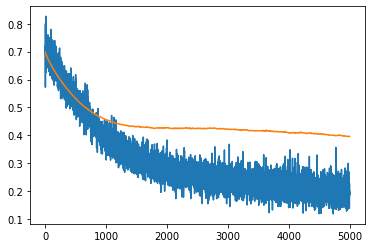

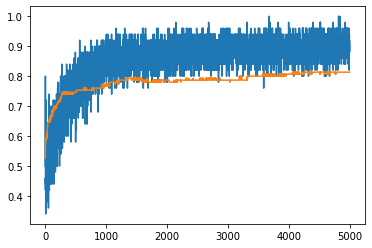

In [4]:
utils.save_model_stats(
    "MLP",
    hist.history["loss"],
    hist.history["val_loss"],
    hist.history["accuracy"],
    hist.history["val_accuracy"],
    elapsed_time,
)

In [11]:
# predict

y_pred_test = model.predict(x=x_test)
y_pred_train = model.predict(x=x_train)

pd.DataFrame(y_pred_test, columns=["pred_proba1", "pred_proba2"]).to_csv("../data/MLP/test_pred.csv", index=False)
pd.DataFrame(y_pred_train, columns=["pred_proba1", "pred_proba2"]).to_csv("../data/MLP/train_pred.csv", index=False)